## Task # 4 - To Explore Decision Tree Algorithm

### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [22]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## 1. Loading iris dataset and creating Dataframe Object

In [3]:
iris = load_iris()

In [7]:
dataframe = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
dataframe["Target"] = iris.target

In [14]:
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2. Saperating independent and dependent variables

In [20]:
X = dataframe.drop("Target", axis=1)
y = dataframe.Target.values

# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [21]:
# Classifier with gini based splits on the data
classifier = DecisionTreeClassifier(criterion="gini")
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
# Classifier with entropy based splits on the data
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 3. Making prediction and checking accuracy score

In [93]:
preds = classifier.predict(X_test)
print("Model Accuracy on test set : {0:.2f}%".format(accuracy_score(y_test, preds)))
print("Model Accuracy on full dataset : {0:.2f}%".format(classifier.score(X, y)))

Model Accuracy on test set : 0.90%
Model Accuracy on full dataset : 0.98%


In [94]:
predictions = clf.predict(X_test)
print("Model Accuracy : {0:.2f}%".format(accuracy_score(y_test, predictions)))
print("Model Accuracy on full dataset : {0:.2f}%".format(clf.score(X, y)))

Model Accuracy : 0.87%
Model Accuracy on full dataset : 0.97%


This shows that model with **gini** based split criterion is better that **entropy** based split in the given dataset

### 4. Visualizing the Decision Tree

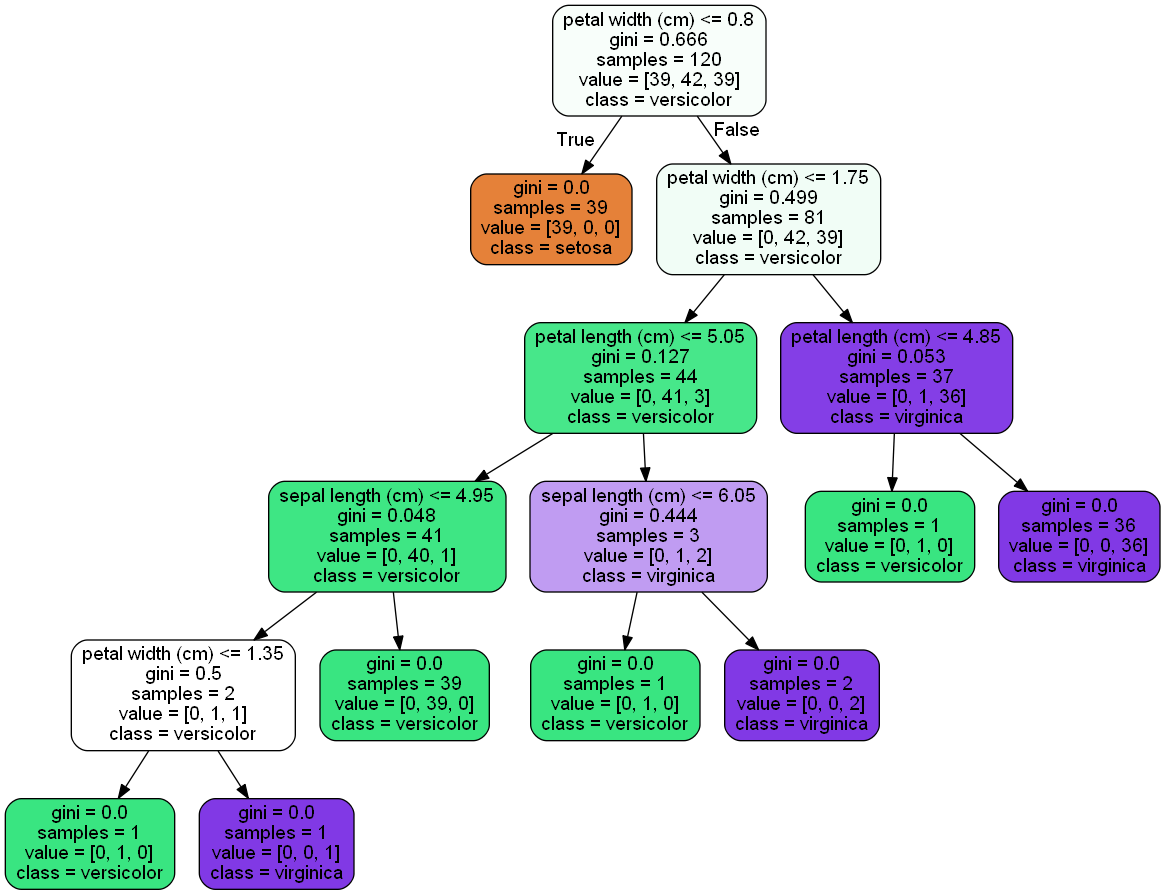

In [49]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

dotData = StringIO()
export_graphviz(classifier, rounded=True, filled=True, out_file=dotData,
                          feature_names=iris.feature_names, class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dotData.getvalue())
graph.write_png("Iris.png")
Image(graph.create_png())